In [1]:
import pandas as pd
import numpy as np
import pyreadr as rr # package to use data from R format
import matplotlib.pyplot as plt
import seaborn as sns
from empiricaldist import Cdf
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
rdata_read = rr.read_r(r"../../data/wage2015_subsample_inference.Rdata") # es una base de Rdata. Estoy saliendo tres carpetas hacia atrás


# Extracting the data frame from rdata_read
data = rdata_read[ 'data' ]


data.shape

(5150, 20)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5150 entries, 10 to 32643
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   wage    5150 non-null   float64 
 1   lwage   5150 non-null   float64 
 2   sex     5150 non-null   float64 
 3   shs     5150 non-null   float64 
 4   hsg     5150 non-null   float64 
 5   scl     5150 non-null   float64 
 6   clg     5150 non-null   float64 
 7   ad      5150 non-null   float64 
 8   mw      5150 non-null   float64 
 9   so      5150 non-null   float64 
 10  we      5150 non-null   float64 
 11  ne      5150 non-null   float64 
 12  exp1    5150 non-null   float64 
 13  exp2    5150 non-null   float64 
 14  exp3    5150 non-null   float64 
 15  exp4    5150 non-null   float64 
 16  occ     5150 non-null   category
 17  occ2    5150 non-null   category
 18  ind     5150 non-null   category
 19  ind2    5150 non-null   category
dtypes: category(4), float64(16)
memory usage: 736.3+ KB


## Description of variables

#### wage

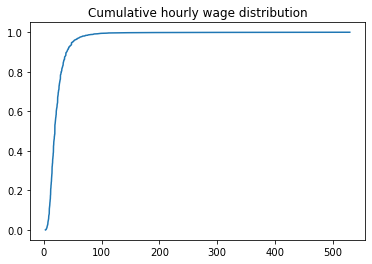

In [4]:
cdf_wage = Cdf.from_seq(data.wage)
# Cumulative distribution
cdf_wage.plot()
plt.title('Cumulative hourly wage distribution') 
plt.show()

#### lwage

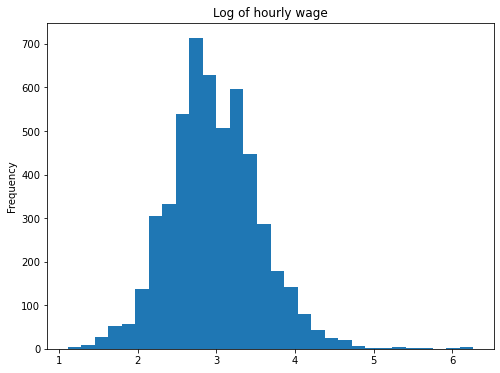

In [5]:
data['lwage'].plot(kind = 'hist', bins = 30, figsize = (8,6))
plt.title('Log of hourly wage')
plt.show()

#### Wage by sex 

[Text(0, 0, 'Men'), Text(1, 0, 'Women')]

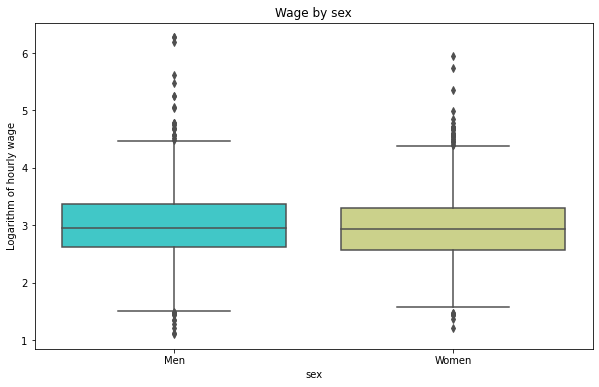

In [6]:
fig, ax = plt.subplots(figsize=(10,6))

box = sns.boxplot(x="sex", y="lwage", data=data ,palette='rainbow')
plt.ylabel('Logarithm of hourly wage')
plt.title('Wage by sex')
(box.set_xticklabels(["Men", "Women"]))

#### Education level and wage

In [7]:
def educ(row):
    if row['shs']==1:
        return "Some high school"
    if row['hsg']==1:
        return "High school graduated"
    if row['scl']==1:
        return "Some college"
    if row['clg']==1:
        return "College graduate"
    if row['ad']==1:
        return "Advanced degree"

In [8]:
data['educ']=data.apply(lambda row: educ(row), axis=1)

Text(0, 0.5, 'Logarithm of hourly wage')

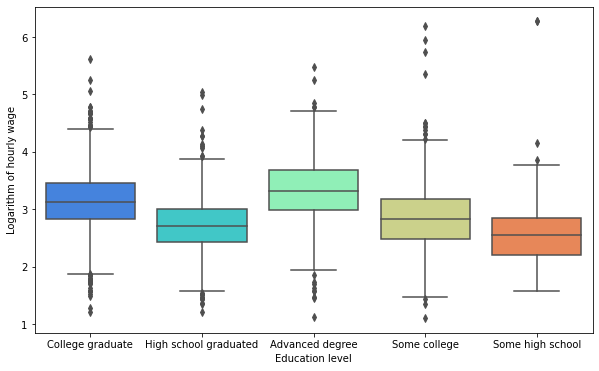

In [9]:
fig, ax = plt.subplots(figsize=(10,6))

box = sns.boxplot(x="educ", y="lwage", data=data ,palette='rainbow')
plt.xlabel('Education level')
plt.ylabel('Logarithm of hourly wage')

#### Some high school

In [14]:
base = data.groupby([ 'sex' ]).count()
base

,wage,lwage,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2,educ
sex,,,,,,,,,,,,,,,,,,,,
0.0,2861,2861,2861,2861,2861,2861,2861,2861,2861,2861,2861,2861,2861,2861,2861,2861,2861,2861,2861,2861
1.0,2289,2289,2289,2289,2289,2289,2289,2289,2289,2289,2289,2289,2289,2289,2289,2289,2289,2289,2289,2289


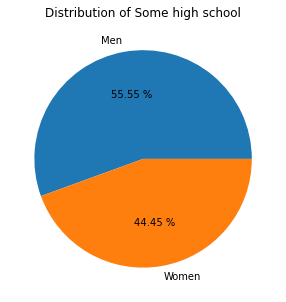

In [12]:
labels=['Men','Women']

plt.figure(figsize=(5,5))

ax = plt.pie(base['shs'],labels=labels, autopct='%.2f %%')
plt.title('Distribution of Some high school')
plt.show()

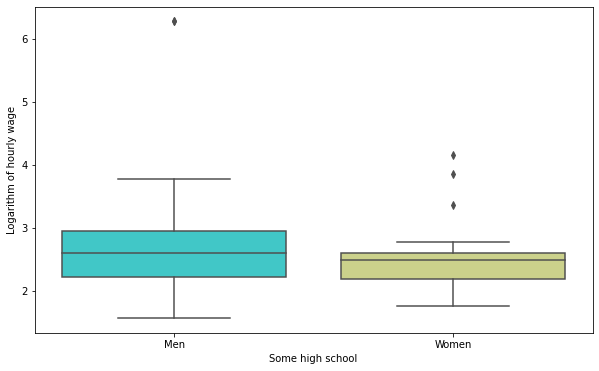

In [13]:
fig, ax = plt.subplots(figsize=(10,6))

box = sns.boxplot(x="sex", y="lwage", data=data[data['shs']==1] ,palette='rainbow')
plt.xlabel('Some high school')
plt.ylabel('Logarithm of hourly wage')
(box.set_xticklabels(["Men", "Women"]))
plt.show()

#### High school graduated

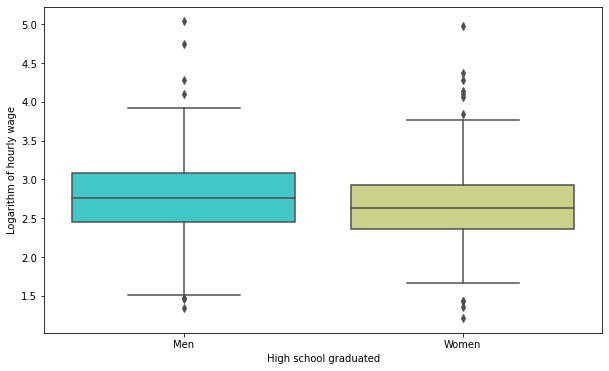

In [24]:
fig, ax = plt.subplots(figsize=(10,6))

box = sns.boxplot(x="sex", y="lwage", data=data[data['hsg']==1] ,palette='rainbow')
plt.xlabel('High school graduated')
plt.ylabel('Logarithm of hourly wage')
(box.set_xticklabels(["Men", "Women"]))
plt.show()

#### Some college

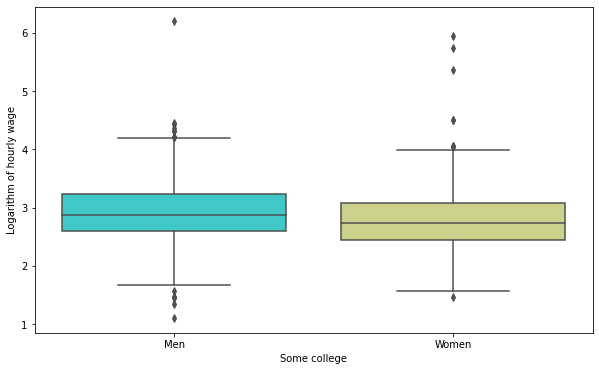

In [23]:
fig, ax = plt.subplots(figsize=(10,6))

box = sns.boxplot(x="sex", y="lwage", data=data[data['scl']==1] ,palette='rainbow')
plt.xlabel('Some college')
plt.ylabel('Logarithm of hourly wage')
(box.set_xticklabels(["Men", "Women"]))
plt.show()

#### College graduated

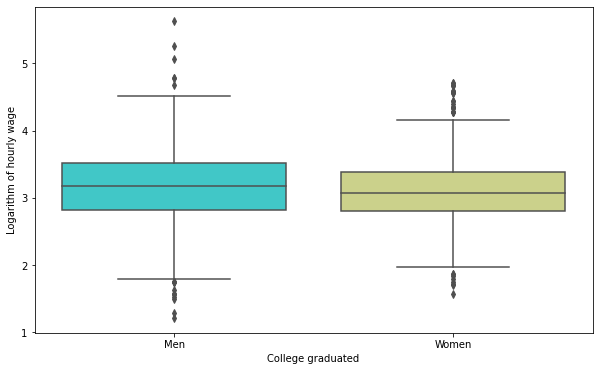

In [22]:
fig, ax = plt.subplots(figsize=(10,6))

box = sns.boxplot(x="sex", y="lwage", data=data[data['clg']==1] ,palette='rainbow')
plt.xlabel('College graduated')
plt.ylabel('Logarithm of hourly wage')
(box.set_xticklabels(["Men", "Women"]))
plt.show()

#### Advanced degree

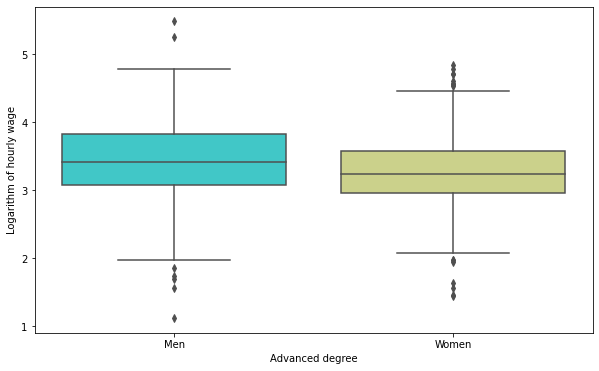

In [21]:
fig, ax = plt.subplots(figsize=(10,6))

box = sns.boxplot(x="sex", y="lwage", data=data[data['ad']==1] ,palette='rainbow')
plt.xlabel('Advanced degree')
plt.ylabel('Logarithm of hourly wage')
(box.set_xticklabels(["Men", "Women"]))
plt.show()